<a href="https://colab.research.google.com/github/lukablaskovic/music-classification-cnn/blob/main/nmdu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## GTZAN Dataset
- 10 classes representing music genres (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock)

[Available here](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

In [ ]:
import os
import librosa
from PIL import Image

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load audio data
audio_data = {}
for genre in genres:
    audio_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/{genre}')
    audio_data[genre] = [librosa.load(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/{genre}/{file}', sr=None)[0] for file in audio_files]


"\n# Load spectrogram images\nspectrogram_images = {}\nfor genre in genres:\n    image_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/images_original/{genre}')\n    spectrogram_images[genre] = [Image.open(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/images_original/{genre}/{file}') for file in image_files]\n\n"

## Simple audio waveform visualization

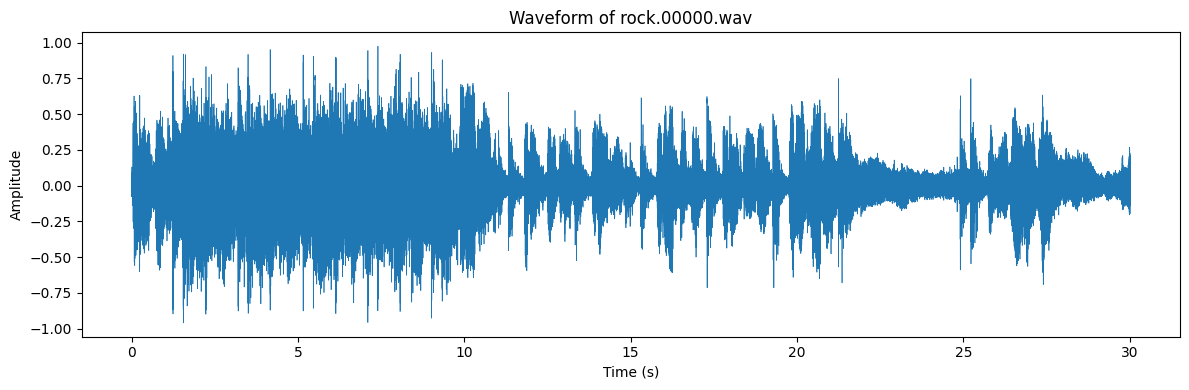

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

AUDIO_FILE = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/rock/rock.00000.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

# Generate time values for each sample
times = np.arange(len(samples)) / sample_rate

plt.figure(figsize=(12, 4))
plt.plot(times, samples, lw=0.5)
plt.title(f'Waveform of rock.00000.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [ ]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (661794,) Sample rate  22050 Data type <class 'numpy.ndarray'>
[ 0.00695801  0.02487183  0.03720093  0.0461731   0.07073975  0.0847168
  0.08685303  0.10891724  0.12097168  0.11602783  0.12515259  0.12878418
  0.11740112  0.08349609  0.05166626  0.04724121  0.02050781 -0.00527954
  0.01361084  0.01818848]


## Different Spectrograms

### Spectrogram visualization #1


<ipython-input-7-741caf0be93b>:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(spectogram)


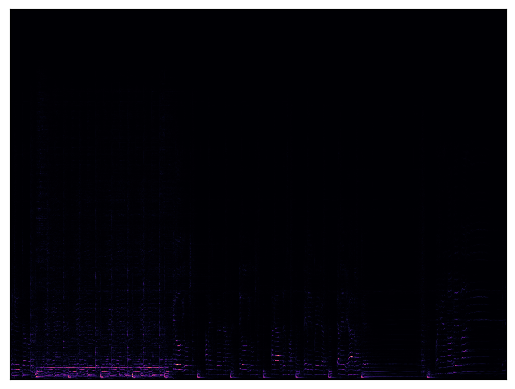

In [ ]:
# The simplest example - it plots Frequency (y-axis) vs Time (x-axis)
spectrogram = librosa.stft(samples)
librosa.display.specshow(spectrogram)

### Spectrogram visualization #2
But with Mel Scale in place of Frequency, for y-axis

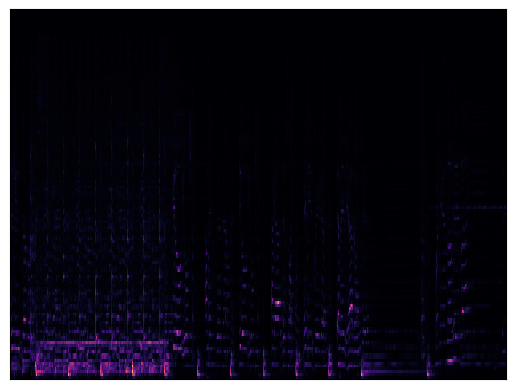

In [ ]:
spectrogram_mag, _ = librosa.magphase(spectrogram)
mel_scale_spectrogram = librosa.feature.melspectrogram(S=spectrogram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_spectrogram)

In [ ]:
print(type(mel_scale_spectrogram), mel_scale_spectrogram.shape)

<class 'numpy.ndarray'> (128, 1293)


### Spectrogram visualization #3
But with Decibel scale in place of Amplitude, for x-axis

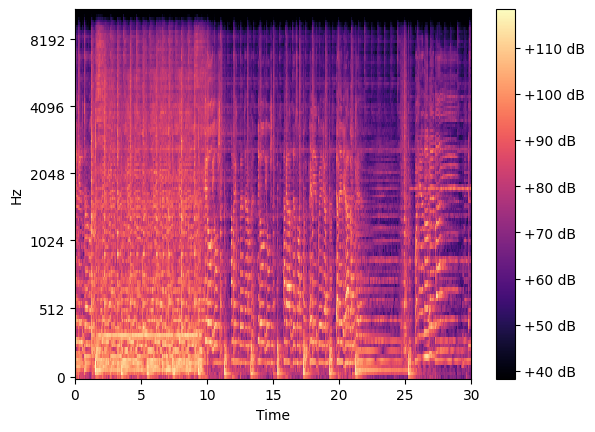

In [ ]:
mel_scale_spectrogram = librosa.amplitude_to_db(mel_scale_spectrogram, ref=np.min)
librosa.display.specshow(mel_scale_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

### MEL and STFT Spectrograms

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2

def create_spectrogram(audio, sr, kind='mel', save_path=None):
    plt.figure(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))

    if kind == 'mel':
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
    elif kind == 'stft':
        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='linear', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title('STFT Spectrogram')
    else:
        raise ValueError("Invalid spectrogram kind. Choose 'mel' or 'stft'.")

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2

# without labels - image only
def save_spectrogram(audio, sr, kind='mel', save_path=None):
    fig, ax = plt.subplots(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))
    ax.axis('off')

    if kind == 'mel':
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr=sr, fmax=8000, ax=ax)
    elif kind == 'stft':
        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr=sr, ax=ax)
    else:
        raise ValueError("Invalid spectrogram kind. Choose 'mel' or 'stft'.")

    # Remove white space and save
    fig.tight_layout(pad=0)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close(fig)

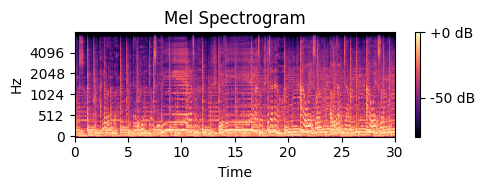

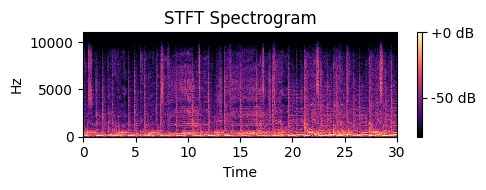

In [ ]:
clip = audio_data["rock"][0]
sr = 22050  # Default sampling rate for librosa

create_spectrogram(clip, sr, kind='mel')
create_spectrogram(clip, sr, kind='stft')

### Generating our own Spectrograms

- generating only mel spectrograms for now, stft is commented-out

In [ ]:
import os
import gc
DEFAULT_SAMPLE_RATE = 22050

# Generate and save spectrograms using the provided function
for genre, clips in audio_data.items():
    # Ensure directories exist
    os.makedirs(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/{genre}', exist_ok=True)

    #os.makedirs(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/stft_spectrograms_raw/{genre}', exist_ok=True)

    for idx, clip in enumerate(clips):
        mel_save_path = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/{genre}/{genre}.{idx}.png'

        #stft_save_path = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/stft_spectrograms_raw/{genre}/{genre}.{idx}.png'

        if os.path.exists(mel_save_path): # and os.path.exists(stft_save_path):
            continue

        save_spectrogram(clip, sr=DEFAULT_SAMPLE_RATE, kind='mel', save_path=mel_save_path)
        #save_spectrogram(clip, sr=DEFAULT_SAMPLE_RATE, kind='stft', save_path=stft_save_path)
        print(f'{genre}.{idx}.png - created')

        gc.collect()

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

for genre in genres:
    genre_folder = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw/{genre}'
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256)) # increased from 128x128, got around 6% better accuracy
        X.append(img_to_array(image))
        y.append(genres.index(genre))

X = np.array(X) / 255.0  # Normalize data
y = np.array(y)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)



X_train.shape (700, 256, 256, 3)
X_test.shape (300, 256, 256, 3)
y_train.shape (700,)
y_test.shape (300,)


# Model #1
- a good starting point
- 2 convolutional layers, one with 32 and other with 64 filters of size 3x3
- ReLU activation functions on conv layers
- 2 pooling layers for reducing the spatial dimensions
- flatten layer to map 2d feature maps into 1d vector
- fully-connected layer of 64 neurons
- **output layer** - 10 neurons, corresponding to 10 genres, softmax because of multi-class task as it outputs a probability distribution over the classes
_________________________________
- Adam optimizer
- sparse categorical crossentropy loss
- evaluation metric: accuracy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model(X_train[0].shape)


In [ ]:
BATCH_SIZE=32

def train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_test, y_test)


Epoch 1/10
22/22 [==============================] - 16s 137ms/step - loss: 5.2355 - accuracy: 0.1314 - val_loss: 2.1863 - val_accuracy: 0.1633
Epoch 2/10
22/22 [==============================] - 1s 68ms/step - loss: 1.8430 - accuracy: 0.3600 - val_loss: 1.7260 - val_accuracy: 0.3600
Epoch 3/10
22/22 [==============================] - 1s 68ms/step - loss: 1.2887 - accuracy: 0.5543 - val_loss: 1.5653 - val_accuracy: 0.4533
Epoch 4/10
22/22 [==============================] - 2s 73ms/step - loss: 0.9662 - accuracy: 0.6600 - val_loss: 1.3404 - val_accuracy: 0.5267
Epoch 5/10
22/22 [==============================] - 2s 74ms/step - loss: 0.6792 - accuracy: 0.8000 - val_loss: 1.2997 - val_accuracy: 0.5633
Epoch 6/10
22/22 [==============================] - 2s 75ms/step - loss: 0.3694 - accuracy: 0.8971 - val_loss: 1.4330 - val_accuracy: 0.5533
Epoch 7/10
22/22 [==============================] - 1s 63ms/step - loss: 0.2754 - accuracy: 0.9271 - val_loss: 1.2041 - val_accuracy: 0.6200
Epoch 8/10


In [ ]:
def predict_genre(model, image):
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_genre = genres[np.argmax(prediction)]
    return predicted_genre


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


10/10 [==============================] - 0s 29ms/step - loss: 1.3505 - accuracy: 0.6233
Training Accuracy: 99.86%
Test Accuracy: 62.33%


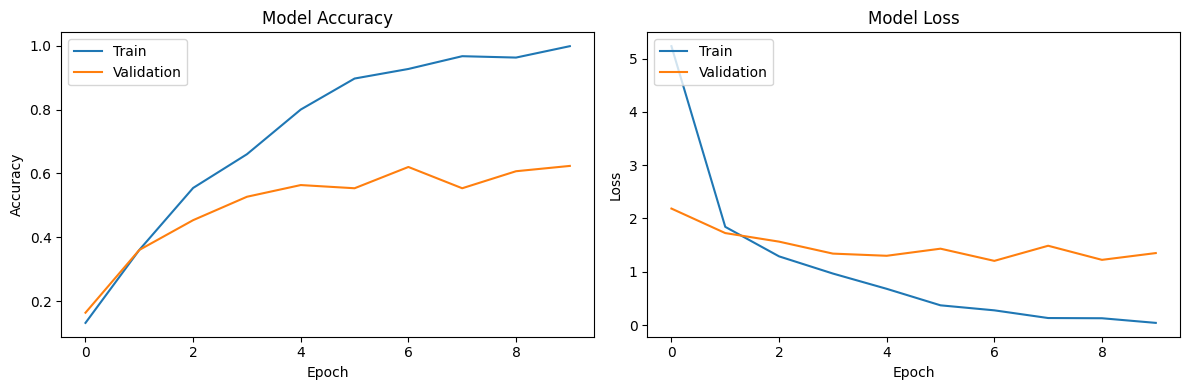

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


# Results 1

- 1000 mel spectrogram images
- 70% training, 30% test
- 500 x 200 image size, scaled down to 256x256 when imported in the model
- no data augmentation
- simple cnn architecture
- Adam optimizer
- around 58% - 62% test accuracy, but overfitting!

**Improvement**: genereated first 1000 x 400 spectrograms and scaled them to 128x128, thus the images lost a lot of quality. Had around 52% accuracy.


### **Accuracy**:
- training gets close to 100%
- test plateau

### **Loss**
- training gets close to 0
- test plateu then increases

- clear overfitting!

# Data Augmentation - Raw audio
- **Time Shifting** - shifts the audio waveform to the left or the right by a random amount (won't be using cause it's not good to do it on music, only good for random sounds like dogs barking, cars, environmental sounds...) ❌
- **Pitch Scaling** - randomly modify the frequency of parts of the sound without altering its duration (move the melody up or down a couple of semi tones, not affecting the speed) ✅
- **Time Stretching** - this alters the speed of the audio clip without changing its pitch (useful for music) ✅
- Add Noise - add some random noise to the sound

## Audio Augmentation Functions
- time streching
- pitch scaling

In [ ]:
import soundfile as sf
import os
import librosa

def augment_and_save_audio(base_dir, save_dir, stretch_factor, n_steps):

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

    for genre in genres:
        # Make genre directory in save_dir if it doesn't exist
        genre_save_dir = os.path.join(save_dir, genre)
        if not os.path.exists(genre_save_dir):
            os.makedirs(genre_save_dir)

        # List audio files in the genre directory
        genre_dir = os.path.join(base_dir, genre)
        audio_files = os.listdir(genre_dir)

        for file in audio_files:
            file_path = os.path.join(genre_dir, file)

            y, sr = librosa.load(file_path, sr=None)

            # Time stretch and pitch shift
            # The following does the augmentation, takes time to compute...
            y_stretched = librosa.effects.time_stretch(y, rate=stretch_factor)

            y_shifted = librosa.effects.pitch_shift(y_stretched, sr=sr, n_steps=n_steps)

            save_path = os.path.join(genre_save_dir, f"aug_{file}")
            sf.write(save_path, y_shifted, sr)


base_dir = "/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original"
save_dir = "/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_augmentation"
stretch_factor = 0.9
n_steps = 2
augment_and_save_audio(base_dir, save_dir, stretch_factor, n_steps)


## Spectrograms from augmented raw audio data

In [ ]:
import os
import gc
DEFAULT_SAMPLE_RATE = 22050

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load audio data
audio_augmented_data = {}

for genre in genres:
    audio_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_augmentation/{genre}')
    audio_augmented_data[genre] = [librosa.load(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_augmentation/{genre}/{file}', sr=None)[0] for file in audio_files]

# Generate and save spectrograms using the provided function
for genre, clips in audio_augmented_data.items():
    # Ensure directories exist
    os.makedirs(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation/{genre}', exist_ok=True)

    for idx, clip in enumerate(clips):
        mel_save_path = f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation/{genre}/{genre}.{idx}.png'

        if os.path.exists(mel_save_path):
            continue

        save_spectrogram(clip, sr=DEFAULT_SAMPLE_RATE, kind='mel', save_path=mel_save_path)
        print(f'{genre}.{idx}.png - created')

        gc.collect()

pop.14.png - created
pop.15.png - created
pop.16.png - created
pop.17.png - created
pop.18.png - created
pop.19.png - created
pop.20.png - created
pop.21.png - created
pop.22.png - created
pop.23.png - created
pop.24.png - created
pop.25.png - created
pop.26.png - created
pop.27.png - created
pop.28.png - created
pop.29.png - created
pop.30.png - created
pop.31.png - created
pop.32.png - created
pop.33.png - created
pop.34.png - created
pop.35.png - created
pop.36.png - created
pop.37.png - created
pop.38.png - created
pop.39.png - created
pop.40.png - created
pop.41.png - created
pop.42.png - created
pop.43.png - created
pop.44.png - created
pop.45.png - created
pop.46.png - created
pop.47.png - created
pop.48.png - created
pop.49.png - created
pop.50.png - created
pop.51.png - created
pop.52.png - created
pop.53.png - created
pop.54.png - created
pop.55.png - created
pop.56.png - created
pop.57.png - created
pop.58.png - created
pop.59.png - created
pop.60.png - created
pop.61.png - 

# Data Augmentation - Spectrograms
The normal transforms we would use for an image don't apply to spectrograms

SpecAugment:
- Time Warping - stretching or squeezing of the spectrogram.
- Frequency Masking - randomly mask out a range of consecutive frequencies by adding verical bars on the spectrogram. ✅

## Spectrogram Augmentation Functions

In [ ]:
import numpy as np

def frequency_mask(spec, F=10, num_masks=1, replace_with_zero=True):
    cloned = np.copy(spec)
    num_mel_channels = cloned.shape[1]


    for i in range(0, num_masks):
        f = np.random.uniform(low=0.0, high=F)
        f_zero = np.random.uniform(low=0.0, high=num_mel_channels - f)

        # avoids randrange error if values are equal and range is empty
        if int(f_zero) == int(f_zero + f):
            return cloned

        mask_end = np.random.randint(f_zero, f_zero + f)
        if replace_with_zero:
            cloned[:, int(f_zero):mask_end] = 0
        else:
            cloned[:, int(f_zero):mask_end] = cloned.mean()

    return cloned

def time_mask(spec, T=20, num_masks=1, replace_with_zero=True):
    cloned = np.copy(spec)
    len_spectro = cloned.shape[2]

    for i in range(0, num_masks):
        t = np.random.uniform(low=0.0, high=T)
        t_zero = np.random.uniform(low=0.0, high=len_spectro - t)

        # avoids randrange error if values are equal and range is empty
        if int(t_zero) == int(t_zero + t):
            return cloned

        mask_end = np.random.randint(t_zero, t_zero + t)
        if replace_with_zero:
            cloned[:, :, int(t_zero):mask_end] = 0
        else:
            cloned[:, :, int(t_zero):mask_end] = cloned.mean()
    return cloned


### Loading both data and applying SpecAugment

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

# Load original data spectrograms
folder = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_raw'
for genre in genres:
    genre_folder = os.path.join(folder, genre)
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256))
        image_array = img_to_array(image)
        image_array = frequency_mask(image_array) # Applying frequency mask on spectrogram images here
        image_array = image_array / 255.0 # normalization

        X.append(image_array)
        y.append(genres.index(genre))

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Load augmented audio data spectrograms
X_aug = []
y_aug = []

folder = '/content/drive/My Drive/NMDU/Projekt/data/GTZAN/mel_spectrograms_augmentation'
for genre in genres:
    genre_folder = os.path.join(folder, genre)
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        image = load_img(image_path, target_size=(256, 256))
        image_array = img_to_array(image)
        # Not doing frequency masking here as the data is already augmented in a different way
        image_array = image_array / 255.0 # normalization

        X_aug.append(image_array)
        y_aug.append(genres.index(genre))

# Append augmented data to the training set
X_train = np.concatenate((X_train, X_aug), axis=0)
y_train = np.concatenate((y_train, y_aug), axis=0)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)


X_train.shape (1800, 256, 256, 3)
X_test.shape (200, 256, 256, 3)
y_train.shape (1800,)
y_test.shape (200,)


### SpecAugment results
- frequency masking applied
- vertical black "bars" can be seen on spectrograms in the visualization below

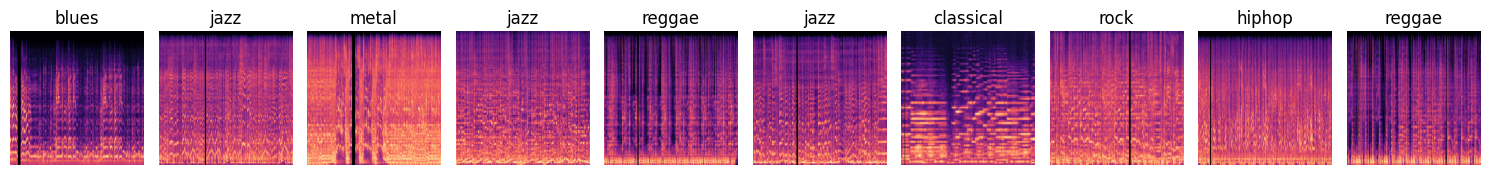

In [ ]:
import matplotlib.pyplot as plt

def visualize_images(images, labels, genres):
    n = len(images)
    plt.figure(figsize=(15, 5))

    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i])
        plt.title(genres[labels[i]])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

sample_images = X_train[:10]
sample_labels = y_train[:10]

visualize_images(sample_images, sample_labels, genres)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model(X_train[0].shape)


In [ ]:
BATCH_SIZE=32
EPOCHS = 10
def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('model2.h5')


Epoch 1/10
57/57 [==============================] - 17s 72ms/step - loss: 2.9973 - accuracy: 0.2522 - val_loss: 1.8899 - val_accuracy: 0.2750
Epoch 2/10
57/57 [==============================] - 3s 56ms/step - loss: 1.4113 - accuracy: 0.5072 - val_loss: 1.3371 - val_accuracy: 0.4900
Epoch 3/10
57/57 [==============================] - 3s 61ms/step - loss: 0.8990 - accuracy: 0.6911 - val_loss: 1.1868 - val_accuracy: 0.6100
Epoch 4/10
57/57 [==============================] - 3s 55ms/step - loss: 0.4688 - accuracy: 0.8506 - val_loss: 1.0920 - val_accuracy: 0.6650
Epoch 5/10
57/57 [==============================] - 3s 55ms/step - loss: 0.1752 - accuracy: 0.9550 - val_loss: 0.9298 - val_accuracy: 0.7100
Epoch 6/10
57/57 [==============================] - 3s 55ms/step - loss: 0.0826 - accuracy: 0.9833 - val_loss: 0.9616 - val_accuracy: 0.6900
Epoch 7/10
57/57 [==============================] - 4s 62ms/step - loss: 0.0425 - accuracy: 0.9917 - val_loss: 0.8700 - val_accuracy: 0.7150
Epoch 8/10
5

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


7/7 [==============================] - 0s 19ms/step - loss: 0.7340 - accuracy: 0.8200
Training Accuracy: 99.94%
Test Accuracy: 82.00%


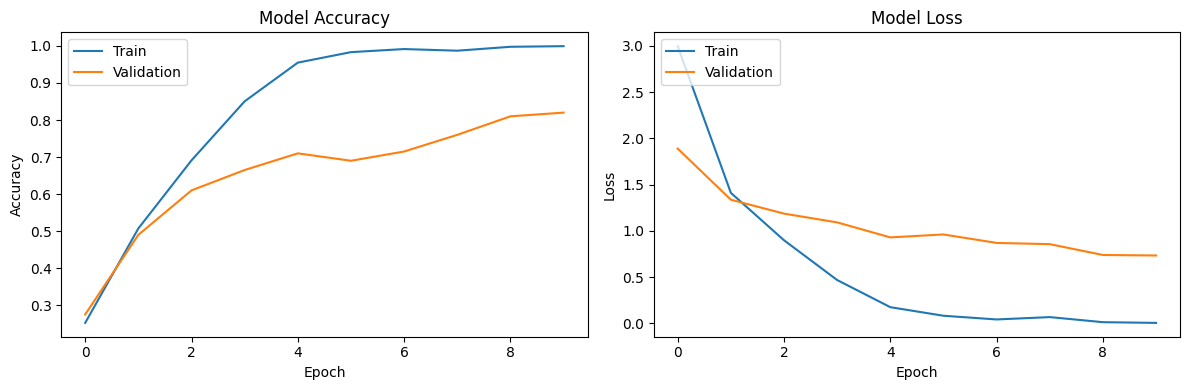

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


## Results 2

- applied data augmentation techniques
- 2000 mel spectrogram images: 1000 generated from raw data augmentation + 1000 generated from augmenting spectrograms of the original data
- 80 % training and 20 % from original data, non additioan augmented, so 200 training data
- around 75-82% accuracy, much better

# Testing

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2
DEFAULT_SAMPLE_RATE = 22050

def audio_to_mel_spectrogram(audio, target_size=(256, 256)):

  fig, ax = plt.subplots(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))
  ax.axis("off")

  S = librosa.feature.melspectrogram(y=audio, sr=DEFAULT_SAMPLE_RATE)
  S_dB = librosa.power_to_db(S, ref= np.max)
  librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr = DEFAULT_SAMPLE_RATE, fmax=8000, ax=ax)

  fig.tight_layout(pad=0)

  # Save the spectrogram as a temporary image
  save_path = "temp_spectrogram.png"
  fig.savefig(save_path, bbox_inches="tight", pad_inches=0, transparent= True)

  # Load and resize the image
  image = load_img(save_path, target_size=target_size)
  return img_to_array(image) / 255.0


In [ ]:
from tensorflow.keras.models import load_model

model_path = "model2.h5"
model = load_model(model_path)


In [ ]:
def predict_genre(model, image_array, genres):
    prediction = model.predict(np.expand_dims(image_array, axis=0))[0]
    return dict(zip(genres, prediction))


In [ ]:
from IPython.display import Audio

audio_file_path = '/content/drive/My Drive/NMDU/Projekt/data/predict/sweet_home_alabama.wav'
Audio(audio_file_path)


1/1 [==============================] - 0s 203ms/step
country: 0.93
rock: 0.05
pop: 0.02
hiphop: 0.00
blues: 0.00
disco: 0.00
reggae: 0.00
jazz: 0.00
metal: 0.00
classical: 0.00


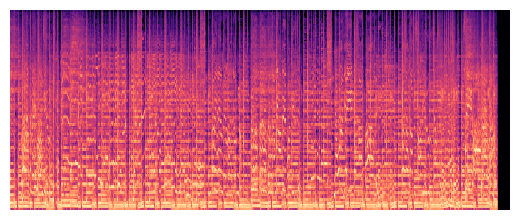

In [ ]:
audio = librosa.load(audio_file_path, sr=None)[0]

image_array = audio_to_mel_spectrogram(audio)
distribution  = predict_genre(model, image_array, genres)

sorted_distribution = sorted(distribution.items(), key=lambda item: item[1], reverse=True)

for genre, probability in sorted_distribution:
    print(f"{genre}: {probability:.2f}")